# CURE

#### IMPORT

In [2]:
pip install pyclustering

In [1]:
from pyclustering.cluster.cure import cure
from sklearn                   import datasets
from sklearn.metrics           import silhouette_score
import matplotlib.pyplot       as plt

#

#### GLOBAL VARIABLE

In [2]:
max_number_cluster = range(2, 11)

#

#### DATASET

In [3]:
iris     = datasets.load_iris()
feat_mtx = iris.data

# 

#### SCELTA NUMERO CLUSTER

In [4]:
models    = [
    (cl, cure(feat_mtx, cl).process().get_clusters())
    for cl in max_number_cluster
]

models_labels     = []
silhouette_scores = []
for cl, model in models:
    labels    = [0] * len(feat_mtx)
    for i, records in enumerate(model):
        for record in records:
            labels[record] = i
    models_labels.append((cl, labels))

for cl, labels in models_labels:
    silhouette_scores.append(silhouette_score(feat_mtx, labels))

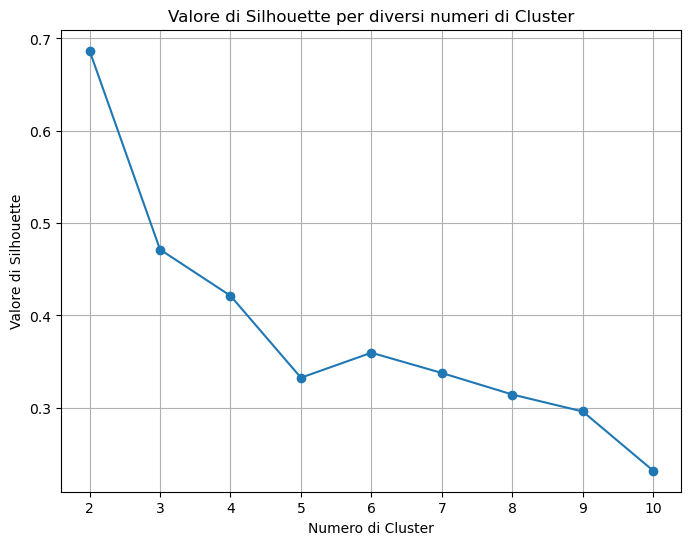

In [5]:
plt.figure(figsize=(8, 6))

plt.plot(max_number_cluster, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Numero di Cluster')
plt.ylabel('Valore di Silhouette')
plt.title('Valore di Silhouette per diversi numeri di Cluster')
plt.grid(True)
plt.show()

#

#### LOGICA

In [8]:
cure_instance = cure(feat_mtx, 3)
cure_instance.process()
clusters      = cure_instance.get_clusters()

# INDICIZZAZIONE CLUSTER
num_cluster   = len(clusters)
labels        = [0] * len(feat_mtx)
for i, records in enumerate(clusters):
    for record in records:
        labels[record] = i

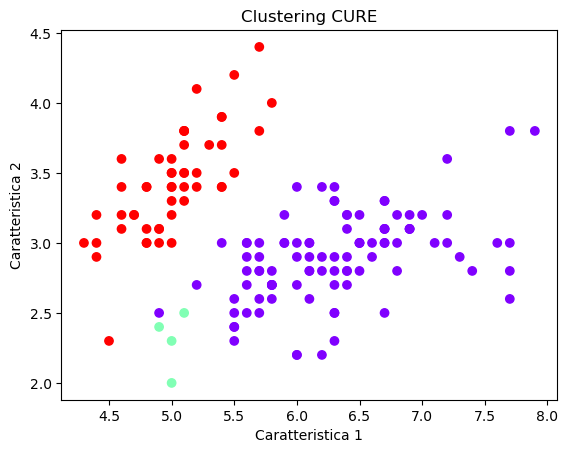

In [9]:
plt.scatter(feat_mtx[:, 0], feat_mtx[:, 1], c=labels, cmap='rainbow')
plt.title('Clustering CURE')
plt.xlabel('Caratteristica 1')
plt.ylabel('Caratteristica 2')
plt.show()